### **Importing the Libraries**

In [1]:
import argparse
import os
import json
import logging
import tempfile
import traceback
from pathlib import Path
from typing import Dict, List, Any, Tuple, Optional
from pypdf import PdfReader
import fitz  
import pdfplumber
from PIL import Image, ImageFilter, ImageOps
import pytesseract
import unicodedata
import re
import hashlib
import os
import requests
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger(__name__)
import io

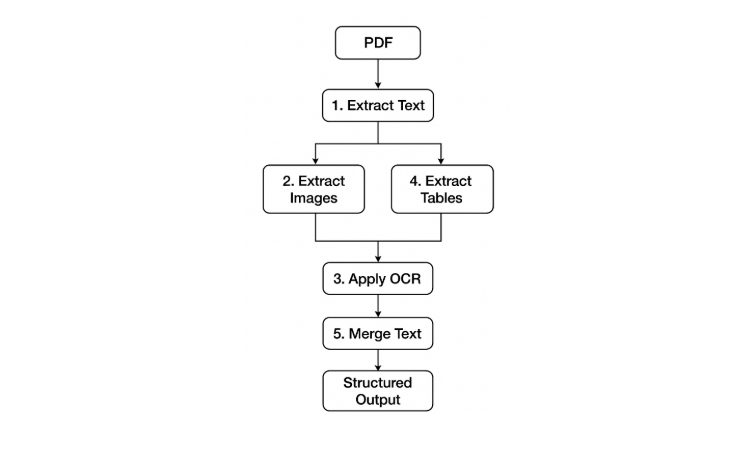

In [2]:
PDF_PATH = "sample_data.pdf"
IMAGE_FOLDER = "extracted_images"
PAGE_FOLDER = "extracted_pages"
OCR_FOLDER = "image_ocr"

In [3]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

### **Extracting the texts from pdfs**

In [4]:
reader = PdfReader(PDF_PATH)
number_of_pages = len(reader.pages)
print(f"\nTotal Pages: {number_of_pages}\n")
for i in range(number_of_pages):
    page = reader.pages[i]
    text = page.extract_text()
    print(f"\n============== PAGE {i+1} TEXT (PyPDF) ==============\n")
    print(text)



Total Pages: 5


============== PAGE 1 TEXT (PyPDF) ==============

 
 
Page 1 of 5 
 
General Rules and Setup for CodeSignal Assessments  
 
1. Use the same email id to register with Codesignal that you have received the invite from Visa.  
 
2. Once you login, your assessment invitation can be found under  Pre-Screens within your 
account. This will also tell you whether the company requesting the assessment result requires 
proctoring. For Visa all our assessments are proctored.  After you select  TAKE TEST  next to a 
new certified assessment invitation, you will be taken to a screen where you need to give 
consent to share results and proctoring. 
  
 
3. How does proctoring work? 
Prior to the test, you will be prompted to share your  camera, microphone, and screen for the 
duration of the test. You will also be prompted to show your  government-issued photo ID  to 
validate your identity.  
CodeSignal does not use identification and proctoring data for any purpose other than to

### **Extracting images from the pdf in the extracted_images folder**

In [5]:
doc = fitz.open(PDF_PATH)
print("\nExtracting images...\n")
for page_index in range(len(doc)):
    page = doc[page_index]
    images = page.get_images(full=True)
    for img_index, img in enumerate(images):
        xref = img[0]
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]
        image_ext = base_image["ext"]
        image = Image.open(io.BytesIO(image_bytes))
        save_path = f"{IMAGE_FOLDER}/page{page_index+1}_img{img_index+1}.{image_ext}"
        image.save(save_path)
        print(f"Saved: {save_path}")


Extracting images...

Saved: extracted_images/page1_img1.jpeg
Saved: extracted_images/page1_img2.png
Saved: extracted_images/page2_img1.jpeg
Saved: extracted_images/page2_img2.jpeg
Saved: extracted_images/page3_img1.jpeg
Saved: extracted_images/page3_img2.png
Saved: extracted_images/page4_img1.jpeg
Saved: extracted_images/page4_img2.jpeg
Saved: extracted_images/page4_img3.png
Saved: extracted_images/page5_img1.jpeg
Saved: extracted_images/page5_img2.png
Saved: extracted_images/page5_img3.jpeg


### **Meta data**

In [6]:
print("\nPDF METADATA :- \n")
print(doc.metadata)
print("\nFIRST PAGE TEXT (Fitz) :- \n")
print(doc.get_page_text(0))


PDF METADATA :- 

{'format': 'PDF 1.7', 'title': '', 'author': 'Tisgaonkar, Prachi Suhas', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word for Microsoft 365', 'producer': 'Microsoft® Word for Microsoft 365', 'creationDate': "D:20240404174931+08'00'", 'modDate': "D:20240806113549+05'30'", 'trapped': '', 'encryption': None}

FIRST PAGE TEXT (Fitz) :- 

 
 
Page 1 of 5 
 
General Rules and Setup for CodeSignal Assessments 
 
1. 
Use the same email id to register with Codesignal that you have received the invite from Visa. 
 
2. Once you login, your assessment invitation can be found under Pre-Screens within your 
account. This will also tell you whether the company requesting the assessment result requires 
proctoring. For Visa all our assessments are proctored. After you select TAKE TEST next to a 
new certified assessment invitation, you will be taken to a screen where you need to give 
consent to share results and proctoring. 
  
 
3. How does proctoring work? 
Prior to the

### **Extraction of tables from the pdf**

In [7]:
print("\nExtracting tables...\n")
with pdfplumber.open(PDF_PATH) as pdf:
    for page in pdf.pages:
        print(f"\n----- Tables from Page {page.page_number} -----")
        tables = page.extract_tables()
        for table in tables:
            print(table)


Extracting tables...


----- Tables from Page 1 -----
[['General Rules and Setup for CodeSignal Assessments'], ['']]
[['2. Once you login, your assessment invitation can be found under Pre-Screens within your'], ['account. This will also tell you whether the company requesting the assessment result requires'], ['proctoring. For Visa all our assessments are proctored. After you select TAKE TEST next to a'], ['new certified assessment invitation, you will be taken to a screen where you need to give'], ['consent to share results and proctoring.']]
[['3. How does proctoring work?'], ['Prior to the test, you will be prompted to share your camera, microphone, and screen for the'], ['duration of the test. You will also be prompted to show your government-issued photo ID to'], ['validate your identity.'], ['CodeSignal does not use identification and proctoring data for any purpose other than to ensure'], ['you have completed the evaluation fairly and that the test taker and the applicant are 

### **Extraction of pages from the pdf**

In [8]:
print("\nSaving each page as PNG...\n")
for i in range(number_of_pages):
    pix = doc.get_page_pixmap(i)
    output_path = f"{PAGE_FOLDER}/page_{i+1}.png"
    pix.save(output_path)
    print(f"Saved page image: {output_path}")
    print(f"\n===== PAGE {i+1} TEXT (Fitz) =====\n")
    print(doc.get_page_text(i))


Saving each page as PNG...

Saved page image: extracted_pages/page_1.png

===== PAGE 1 TEXT (Fitz) =====

 
 
Page 1 of 5 
 
General Rules and Setup for CodeSignal Assessments 
 
1. 
Use the same email id to register with Codesignal that you have received the invite from Visa. 
 
2. Once you login, your assessment invitation can be found under Pre-Screens within your 
account. This will also tell you whether the company requesting the assessment result requires 
proctoring. For Visa all our assessments are proctored. After you select TAKE TEST next to a 
new certified assessment invitation, you will be taken to a screen where you need to give 
consent to share results and proctoring. 
  
 
3. How does proctoring work? 
Prior to the test, you will be prompted to share your camera, microphone, and screen for the 
duration of the test. You will also be prompted to show your government-issued photo ID to 
validate your identity.  
CodeSignal does not use identification and proctoring data

### **Extraction of text from the image**

In [9]:
print("\nRunning OCR on extracted images...\n")
for file in os.listdir(IMAGE_FOLDER):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(IMAGE_FOLDER, file)
        img = Image.open(img_path)
        text = pytesseract.image_to_string(img)
        ocr_text_path = f"{OCR_FOLDER}/{file}.txt"
        with open(ocr_text_path, "w", encoding="utf-8") as f:
            f.write(text)
        print(f"OCR saved: {ocr_text_path}")


Running OCR on extracted images...



OCR saved: image_ocr/page1_img1.jpeg.txt
OCR saved: image_ocr/page1_img2.png.txt
OCR saved: image_ocr/page2_img1.jpeg.txt
OCR saved: image_ocr/page2_img2.jpeg.txt
OCR saved: image_ocr/page3_img1.jpeg.txt
OCR saved: image_ocr/page3_img2.png.txt
OCR saved: image_ocr/page4_img1.jpeg.txt
OCR saved: image_ocr/page4_img2.jpeg.txt
OCR saved: image_ocr/page4_img3.png.txt
OCR saved: image_ocr/page5_img1.jpeg.txt
OCR saved: image_ocr/page5_img2.png.txt
OCR saved: image_ocr/page5_img3.jpeg.txt


In [10]:
print("\nOCR TEXT RESULTS : \n")
for file in os.listdir(IMAGE_FOLDER):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(IMAGE_FOLDER, file)
        img = Image.open(img_path)
        text = pytesseract.image_to_string(img)
        print(f"\n")
        print(f"\nTEXT FROM: {file}")
        print("\n")
        print(text)


OCR TEXT RESULTS : 




TEXT FROM: page1_img1.jpeg


Powering payments,
uplifting people





TEXT FROM: page1_img2.png


(CREENS TECH SCREENS

7 CodeSignal mv PROFILE

Pre-Screens

REQUESTS — PRACTICE

Coding Report

VIEW REPORT
Your Coding Score is generated from your best certified result.

Evaluation Company Proctored Expires Next Attempt

TEST ACCOUNT Pre-Screen [© stare |

General Coding Framework. reer No) Sep 12, 2023 Ready @ SHARE

DECLINE

GCA Framework Test
General Coding Framework reer Yes Jan 31, 2024 Ready @ SHARE

DECLINE




TEXT FROM: page2_img1.jpeg


Powering payments,
uplifting people





TEXT FROM: page2_img2.jpeg


Compatibility

2) Check Camera &

Microphone

5) Share Screen VY

©) Network
Connection

5) Face Your browser is compatible with CodeSignal proctoring.

©) Take Photo ID

>) Verity





TEXT FROM: page3_img1.jpeg


Powering payments,
uplifting people





TEXT FROM: page3_img2.png


General Coding Assessment

1 hour, 10 minutes duration Submit your ta

### **Langchain**

### **Text extraction from image by langchain**

In [14]:
%pip install langchain unstructured
from langchain_community.document_loaders.image import UnstructuredImageLoader

from PIL import Image
from io import BytesIO
def extract_text_with_langchain_image(list_dict_final_images):
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []
    for image_bytes in image_list:
        image = Image.open(BytesIO(image_bytes))
        loader = UnstructuredImageLoader(image)
        docs = loader.load()
        img_text = "\n".join([d.page_content for d in docs])
        image_content.append(img_text)
    return "\n".join(image_content)

Note: you may need to restart the kernel to use updated packages.


### **Extraction of Text from pdf**

In [16]:
from langchain_community.document_loaders  import PyPDFLoader
def extract_text_with_langchain_pdf(pdf_path):
    loader = PyPDFLoader(pdf_path)
    pages = loader.load()
    return "\n".join([p.page_content for p in pages])

### **Combined Form**

In [17]:
def full_extraction_pipeline(pdf_path, list_dict_final_images):
    try:
        pdf_text = extract_text_with_langchain_pdf(pdf_path)
    except Exception as e:
        pdf_text = ""
        print("PDF extraction failed:", e)
    try:
        image_text = extract_text_with_langchain_image(list_dict_final_images)
    except Exception as e:
        image_text = ""
        print("Image OCR failed:", e)
    final_output = {
        "pdf_text": pdf_text,
        "image_text": image_text,
        "merged_text": pdf_text + "\n" + image_text
    }
    return final_output


### **Model**

In [ ]:
import pickle
class OCRModel:
    def __init__(self):
        pass
    def predict(self, image_or_pdf_path, extra_args=None):
        if extra_args is None:
            extra_args = []
        extracted_text = full_extraction_pipeline(image_or_pdf_path, extra_args)
        return extracted_text
model = OCRModel()
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [23]:
import pickle
with open("model.pkl", "rb") as f:
    model = pickle.load(f)
text = model.predict("sample_data.pdf")
print(text)


{'pdf_text': 'Page 1 of 5 \n \nGeneral Rules and Setup for CodeSignal Assessments  \n \n1. Use the same email id to register with Codesignal that you have received the invite from Visa.  \n \n2. Once you login, your assessment invitation can be found under  Pre-Screens within your \naccount. This will also tell you whether the company requesting the assessment result requires \nproctoring. For Visa all our assessments are proctored.  After you select  TAKE TEST  next to a \nnew certified assessment invitation, you will be taken to a screen where you need to give \nconsent to share results and proctoring. \n  \n \n3. How does proctoring work? \nPrior to the test, you will be prompted to share your  camera, microphone, and screen for the \nduration of the test. You will also be prompted to show your  government-issued photo ID  to \nvalidate your identity.  \nCodeSignal does not use identification and proctoring data for any purpose other than to ensure \nyou have completed the evaluatio